## ANN AND RANDOM FOREST MODEL TO PREDICT WATER POTABILITY

AUTHOR: EMMANUEL MASINDI

DATASET: 'water_potability.csv'

## PART 1 - IMPORT LIBRARIES AND DATA

Import libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
plt.style.use('fivethirtyeight')

## PART 2 - LOAD DATASET

In [40]:
dataset = pd.read_csv('water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Taking Care of Missing Data

In [42]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

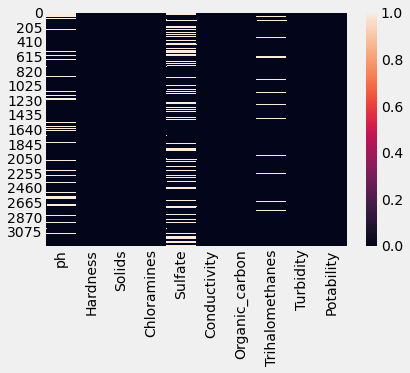

In [43]:
sns.heatmap(dataset.isnull())

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['ph','Sulfate','Trihalomethanes']])
dataset[['ph','Sulfate','Trihalomethanes']] = imputer.transform(dataset[['ph','Sulfate','Trihalomethanes']])

<AxesSubplot:>

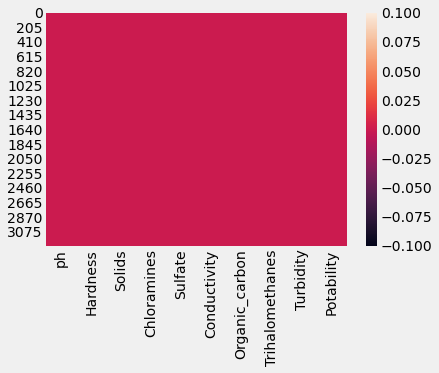

In [46]:
sns.heatmap(dataset.isnull())

## PART 3 - DATA VISUALIZATION

Visualise the dataset

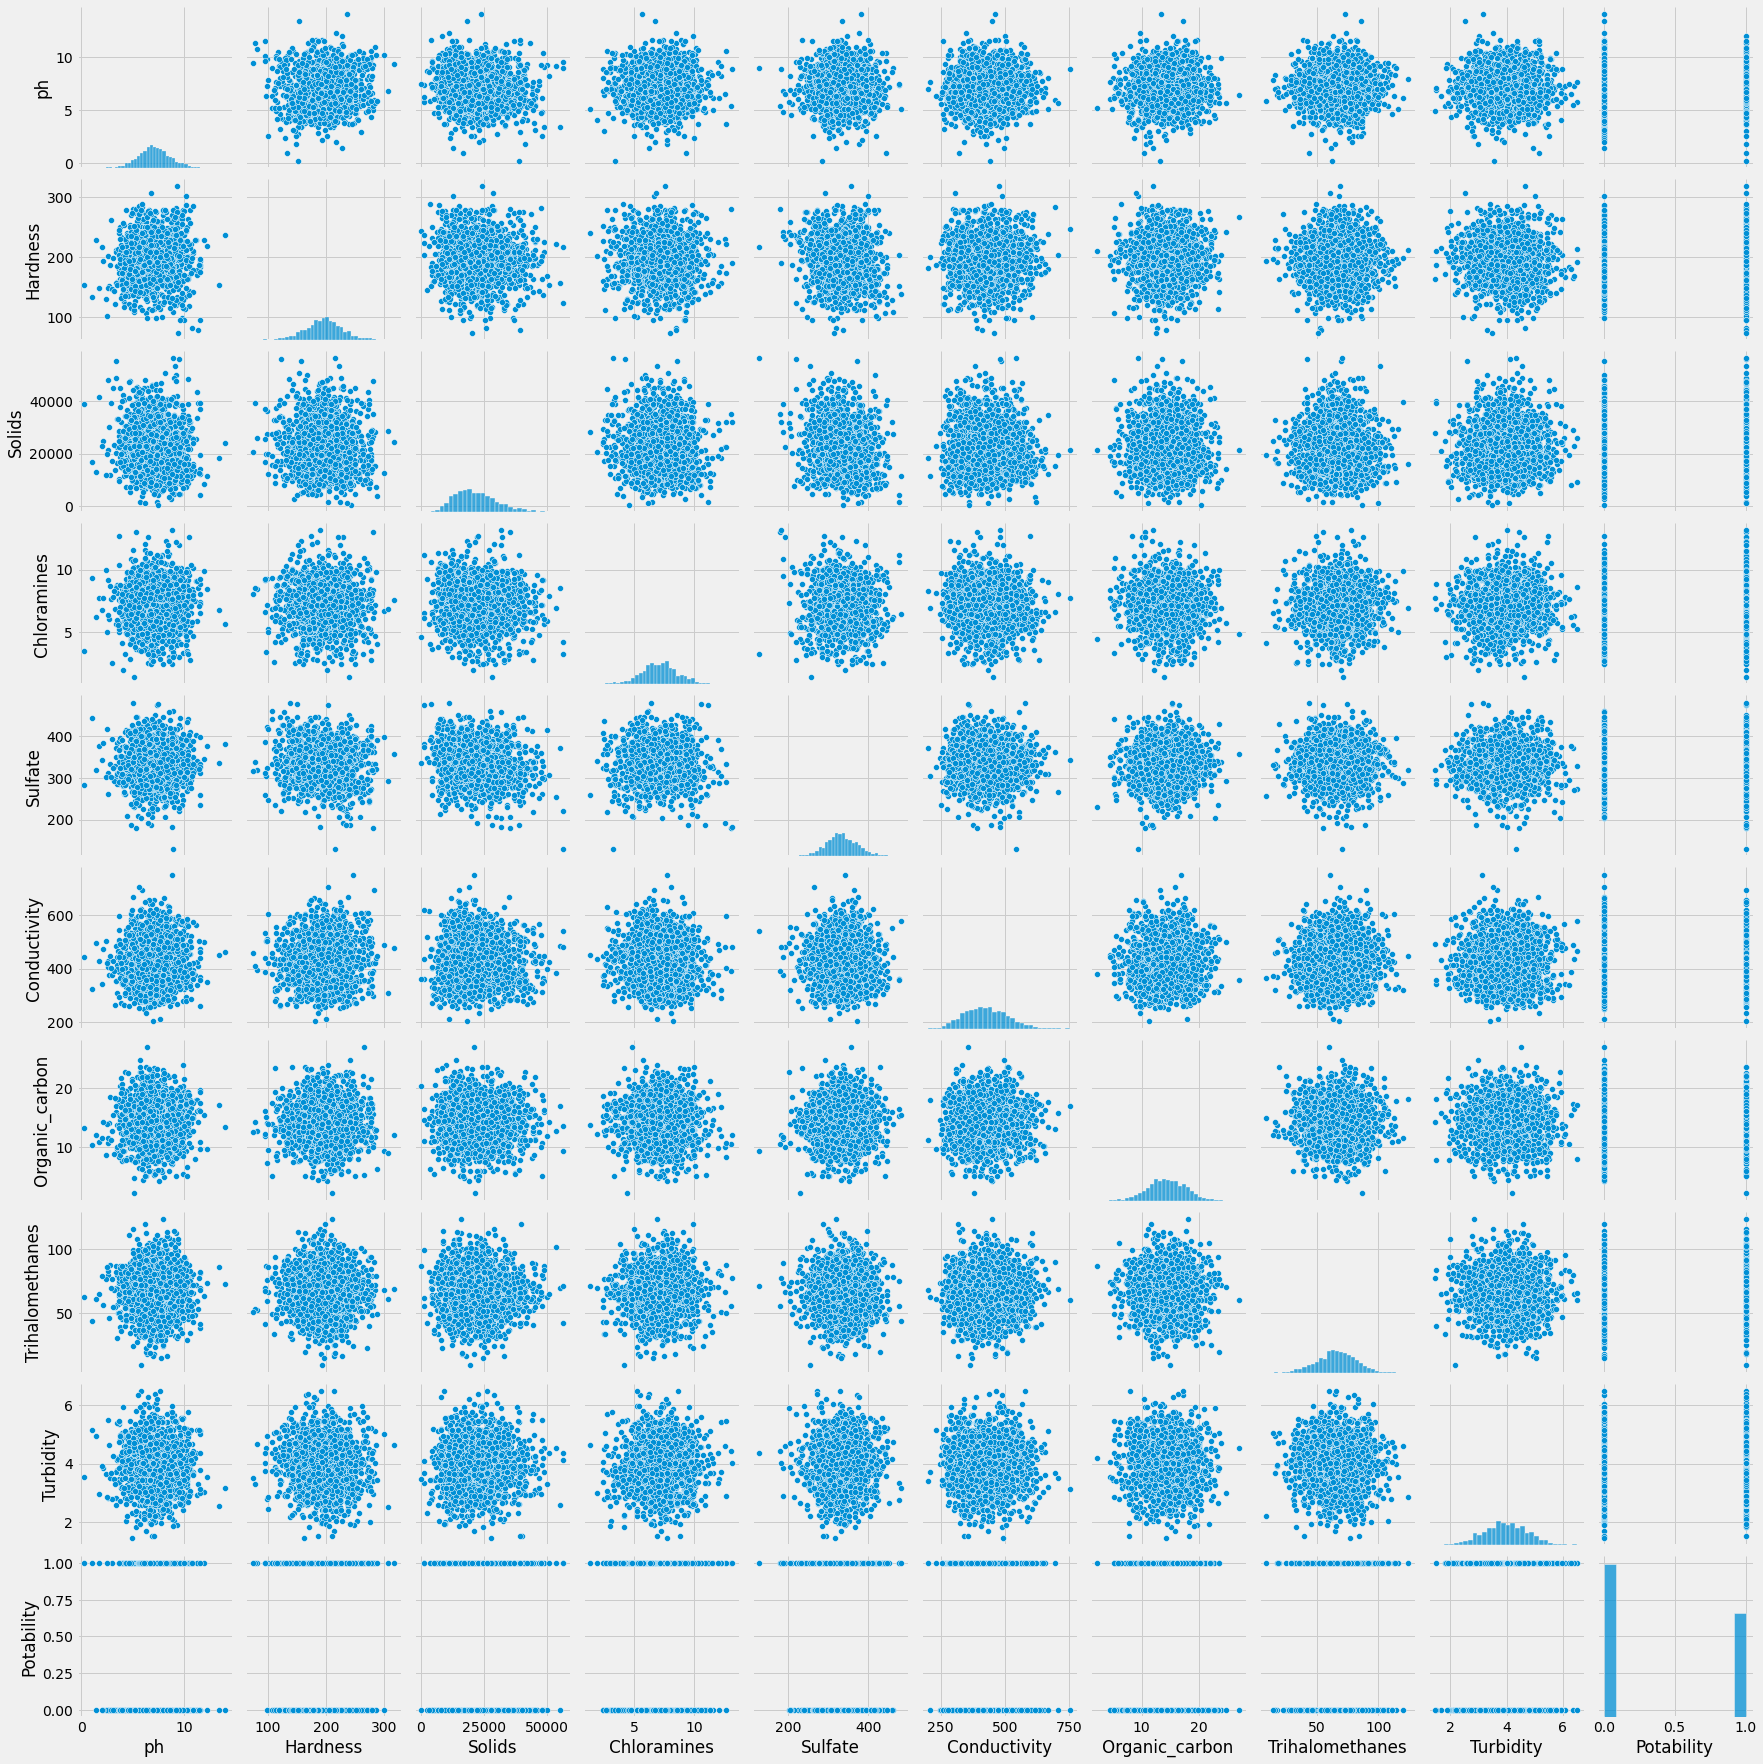

In [ ]:
sns.pairplot(data = dataset)

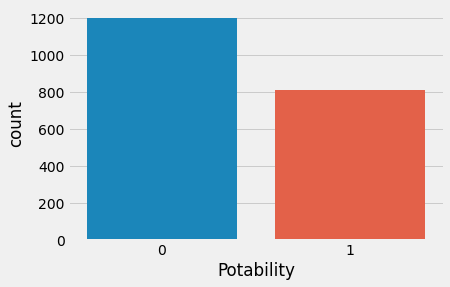

In [ ]:
sns.countplot(data = dataset, x = 'Potability')

Text(0.5, 1.0, 'Feature correlation to Water Potability')

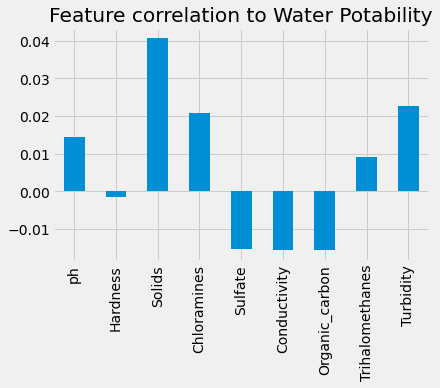

In [ ]:
dataset.corr().iloc[:,-1][:-1].plot(kind = 'bar')
plt.title('Feature correlation to Water Potability')

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


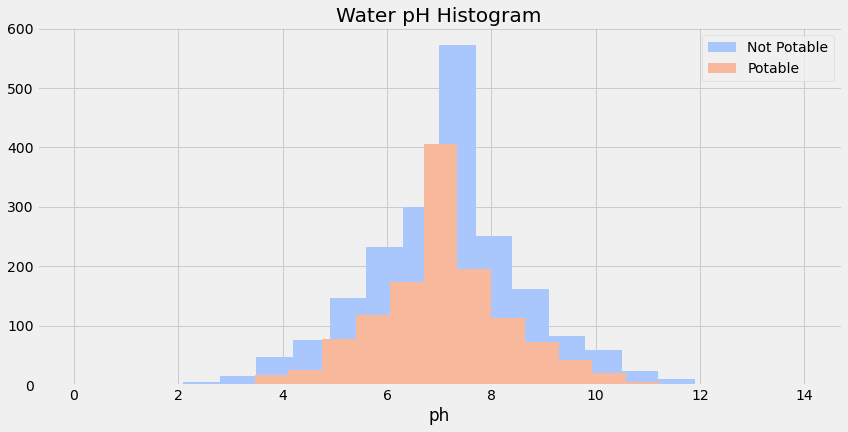

In [28]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'ph',bins=20)
plt.title('Water pH Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


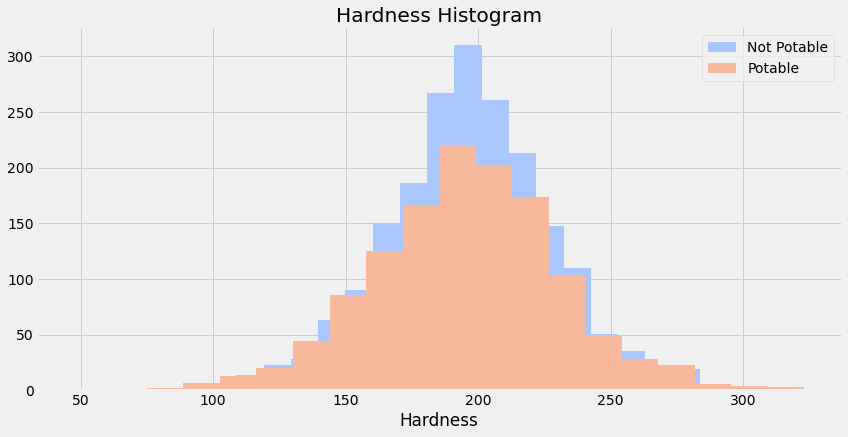

In [56]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Hardness',bins=20)
plt.title('Hardness Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


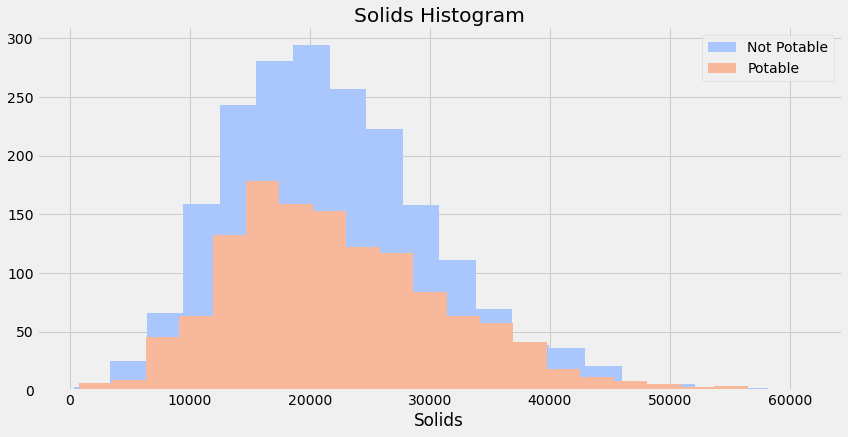

In [57]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Solids',bins=20)
plt.title('Solids Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


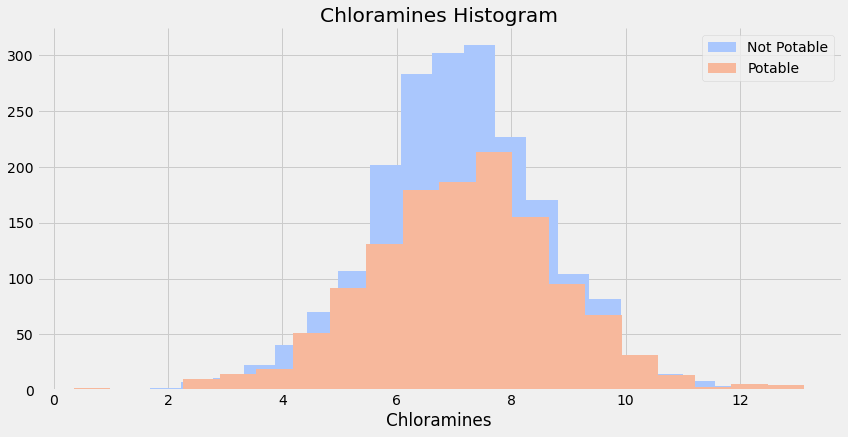

In [58]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Chloramines',bins=20)
plt.title('Chloramines Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


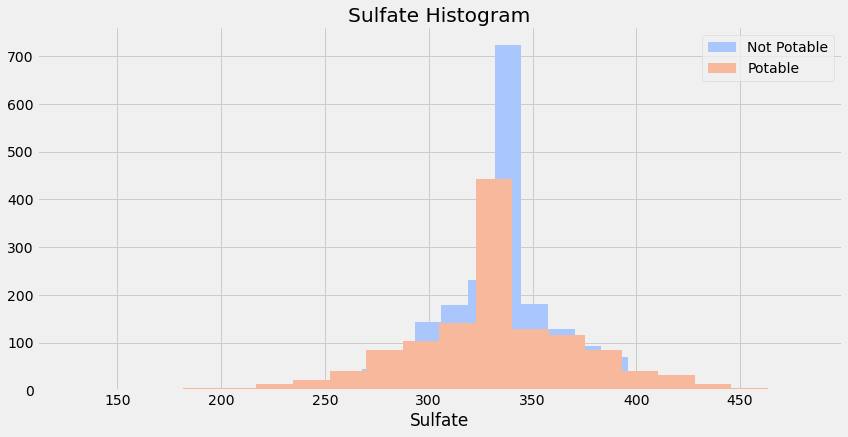

In [59]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Sulfate',bins=20)
plt.title('Sulfate Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


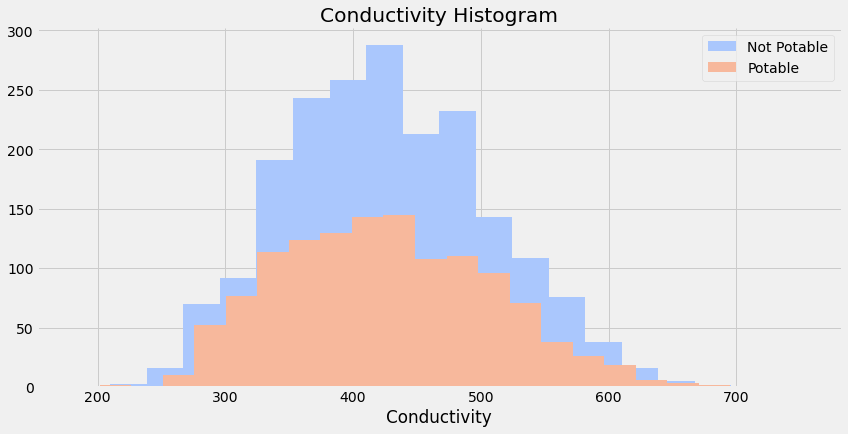

In [60]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Conductivity',bins=20)
plt.title('Conductivity Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


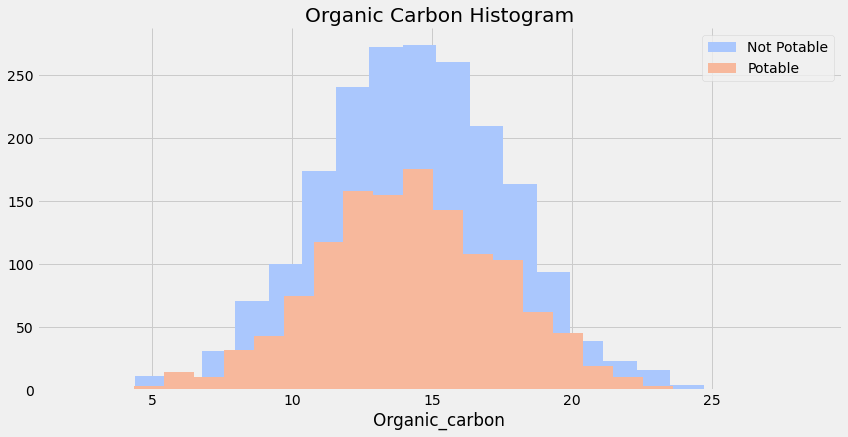

In [61]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Organic_carbon',bins=20)
plt.title('Organic Carbon Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


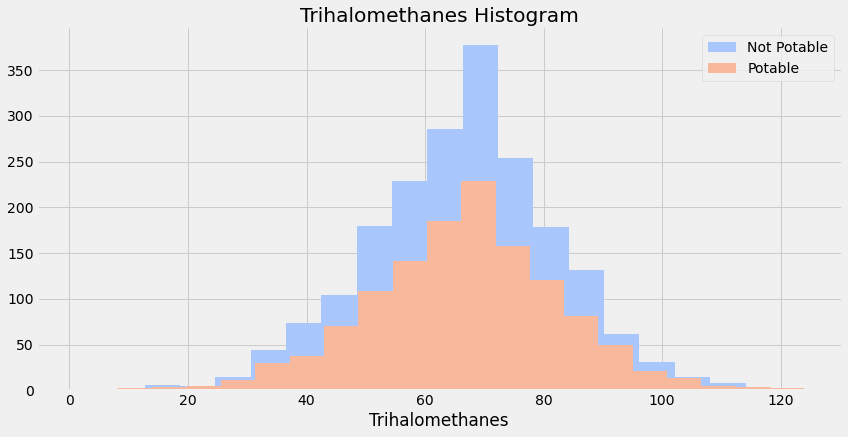

In [62]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Trihalomethanes',bins=20)
plt.title('Trihalomethanes Histogram')
plt.legend(['Not Potable','Potable'])

C:\Users\27664\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


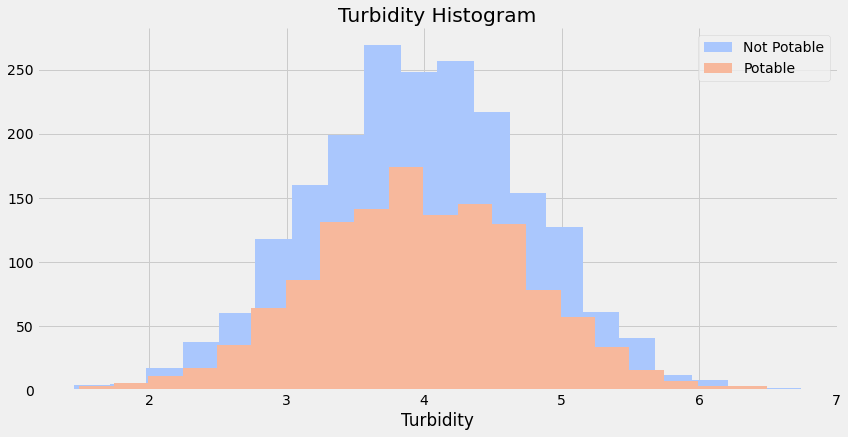

In [63]:
g = sns.FacetGrid(dataset, hue='Potability', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Turbidity',bins=20)
plt.title('Turbidity Histogram')
plt.legend(['Not Potable','Potable'])

In [32]:
dataset.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## PART 4 - DATA PREPROCESSING

In [11]:
sc = MinMaxScaler(feature_range=(0,1))

In [43]:
X = dataset[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = dataset['Potability']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [45]:
X_train = sc.fit_transform(X_train)

## PART 5 - BUILDING THE ANN MODEL

In [115]:
model = 0

In [116]:
model = Sequential()

Add first layer including dropout

In [117]:
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dropout(0.2))

Add second layer including dropout

In [118]:
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dropout(0.2))

In [119]:
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dropout(0.2))

Add fourth layer including dropout

In [120]:
model.add(Dense(units = 80, activation = 'relu'))
model.add(Dropout(0.2))

Add final layer

In [121]:
model.add(Dense(units = 1, activation = 'sigmoid'))

Compile model and add optimizer

In [122]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

Import early stopping

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 1)

Train the neural network

In [125]:
model.fit(X_train, y_train, batch_size = 2, validation_data = (X_test,y_test), epochs=6, callbacks = early_stop)

Epoch 1/6
855/855 [==============================] - 9s 8ms/step - loss: 0.6814 - accuracy: 0.5892 - val_loss: 430.6888 - val_accuracy: 0.5993
Epoch 2/6
855/855 [==============================] - 8s 10ms/step - loss: 0.6785 - accuracy: 0.5916 - val_loss: 181.5898 - val_accuracy: 0.5993
Epoch 3/6
855/855 [==============================] - 7s 8ms/step - loss: 0.6780 - accuracy: 0.5963 - val_loss: 235.4261 - val_accuracy: 0.5993
Epoch 00003: early stopping


## PART 6 - ASSESS ANN MODEL PERFORMANCE

Visualize the model accuracy

In [126]:
model_performance = pd.DataFrame(model.history.history)

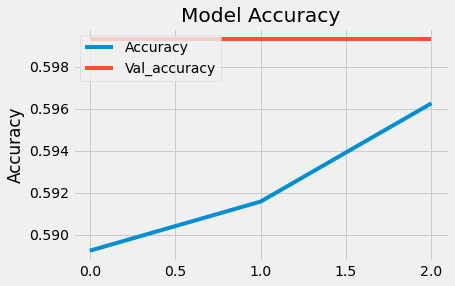

In [127]:
plt.plot(model_performance['accuracy'])
plt.plot(model_performance['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val_accuracy'], loc = 'upper left')

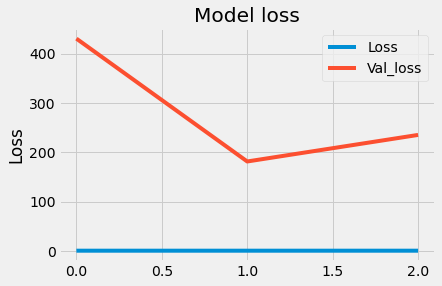

In [128]:
plt.plot(model_performance['loss'])
plt.plot(model_performance['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Loss','Val_loss'], loc = 'upper right')

## PART 8.1: BUILDING DECISION TREE

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = dataset[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = dataset['Potability']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier()

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
predictions = dtree.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

[[364 253]
 [193 173]]


              precision    recall  f1-score   support

           0       0.65      0.59      0.62       617
           1       0.41      0.47      0.44       366

    accuracy                           0.55       983
   macro avg       0.53      0.53      0.53       983
weighted avg       0.56      0.55      0.55       983



## PART 8.2: BUILDING RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators = 400)

In [79]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [80]:
rfc_pred = rfc.predict(X_test)

In [81]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[548  69]
 [247 119]]


              precision    recall  f1-score   support

           0       0.69      0.89      0.78       617
           1       0.63      0.33      0.43       366

    accuracy                           0.68       983
   macro avg       0.66      0.61      0.60       983
weighted avg       0.67      0.68      0.65       983

